# Проект по А/В-тестированию

## Содержание

##### Часть 1. Введение:
* [1.1 Цель проекта](#section_1.1)
* [1.2 Загрузка библиотек](#section_1.2)

##### Часть 2. Изучение и очистка данных:
* [2.1 Изучение и предобработка данных](#section_2.1)
* [2.2 Проверка данных для анализа и приведение их в соответствие с техзаданием](#section_2.2)
* [2.3 Выводы и рекомендации](#section_2.3)

##### Часть 3. Анализ результатов А/В-теста:
* [3.1 Исследовательский анализ данных](#section_3.1)
* [3.2 Выводы](#section_3.2)

# Часть 1. Введение

<a id='section_1.1'> </a>
## 1.1 Цель проекта

Целью проекта — провести оценку A/B-теста проводившегося в интернет-магазине для тестирования изменений, связанных с внедрением улучшенной рекомендательной системы.

В ходе выполнения проекта планируется провести:

1. проверку корректности проведения теста (соответствие техзаданию),
2. оценку результатов теста.

##### Техническое задание
- Название теста: recommender_system_test.
- Группы: А (контрольная), B (новая платёжная воронка).
- Дата запуска: 2020-12-07.
- Дата остановки набора новых пользователей: 2020-12-21.
- Дата остановки: 2021-01-04.
- Аудитория: 15% новых пользователей из региона EU.
- Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы.
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров (событие product_page),
    - просмотры корзины (product_cart),
    - покупки (purchase).

<a id = 'section_1.2'> </a>
## 1.2 Загрузка необходимых библиотек

Загрузим необходимые библиотеки.

In [1]:
import pandas as pd

import datetime as dt
from scipy import stats as st
import math as mth

from matplotlib import pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

# Часть 2. Изучение и предобработка данных

<a id = 'section_2.1'> </a>
## 2.1 Изучение и предобработка данных

Изучим полученные данные.

##### Датафрейм ab_project_marketing_events

Начнем с датафрейма `ab_project_marketing_events`. Это календарь маркетинговых событий на 2020 год, в котором предположительно содержится информация о названии акции; регионе, в котором она проводится; сроках ее проведения.

In [2]:
# Загружаем датафрейм и смотрим его содержимое
ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
ab_project_marketing_events.sort_values(by='start_dt', ascending = False)

,name,regions,start_dt,finish_dt
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07
4,4th of July Promo,N.America,2020-07-04,2020-07-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19


Видим, что в период проведения анализируемого A/B-теста для аудитории теста (пользователей из Европы) проводилась промоакция, связанная с Рождеством и Новым годом. Сроки проведения акции - с 25 декабря 2020 года по 3 января 2021 года. 

Другие промоакции в период теста для аудитории теста не проводились. 

##### Датафрейм final_ab_new_users

Изучим датафрейм `final_ab_new_users`. Предположительно в датасете находится инфомрация обо всех пользователях, зарегистрировавшихся в интернет-магазине в период с 7 по 21 декабря 2020 года, с указанием идентификатора пользователя; даты регистрации; региона пользователя; устройства, с которого происходила регистрация.

In [3]:
# Загружаем датафрейм и смотрим первые строки
final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
final_ab_new_users.head(5)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [4]:
# Изучаем информацию о данных методом info()
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [5]:
# Проверяем данные на наличие дубликатов
final_ab_new_users.duplicated().sum()

0

In [6]:
# Меняем тип в столбце с датой
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'])
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [7]:
# Смотрим информацию о периоде, за который собраны данные
final_ab_new_users['first_date'].describe()

count                   61733
unique                     17
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object

In [8]:
# Смотрим, о пользователях из каких регионов, содержится инфомрация в датафрейме
final_ab_new_users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

In [9]:
# Смотрим, с каких устройств регистрировались пользователи
final_ab_new_users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

По результатам изучения данных можем сделать следующие выводы:

1. Датасет содержит данные о новых пользователях за период с 7 по 23 декабря. В тест должны попасть только новые пользователи, зарегистрировавшиеся с 7 по 21 декабря.
2. Данные не содержат пропусков и дубликатов.
3. В датасете содержатся данные о новых пользователях из регионов Северная Америка, Европа, СНГ, АТР, которые регистрировались с устройств типа PC, Mac, iPhone и Android. В тест должны попасть только новые пользователи из Европы.

##### Датафрейм final_ab_participants

Изучим датафрейм `final_ab_participants`. В нем содержится информация об участниках тестов, включая идентификатор пользователя, название теста и группу пользователя.

In [10]:
# Загружаем датафрейм и смотрим первые строки
final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')
final_ab_participants.head(5)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [11]:
# Изучим полноту и типы данных методом info
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [12]:
# Смотрим, информация о пользователях, участвовавших в каких тестах, содержится в датафрейме
final_ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [13]:
# Проверяем на наличие дубликатов
final_ab_participants.duplicated().sum()

0

In [14]:
# Смотрим, какое количество записей относится к анализируемому тесту 
len(final_ab_participants.query('ab_test == "recommender_system_test"'))

6701

Датафрейм содержит 18267 уникальных записей с id пользователей, из которых 6701 запись относятся к пользователям, участвовавшим в A/B-тесте, результаты которого мы анализируем. 

##### Датафрейм final_ab_events

Изучим датафрейм `final_ab_events`. Предположительно, данный датасет содержит информацию обо всех событиях новых пользователей в период с 7 декабря 2020 года по 4 января 2021 года, включая идентификатор пользователя, дату и время события, тип события и данные о стоимости покупок.

In [15]:
# Загружаем датасет и смотрим первые строки
final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
final_ab_events.head(5)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [16]:
# Изучаем полноту и типы данных
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [17]:
# Проверяем на наличие дубликатов 
final_ab_events.duplicated().sum()

0

In [18]:
# Смотрим, какие уникальные события соедржатся в столбце events
final_ab_events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [19]:
# Меняем тип данных для столбца с датой и временем на корректный
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'])
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null datetime64[ns]
event_name    440317 non-null object
details       62740 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [20]:
# Смотрим, за какой период собраны данные
final_ab_events['event_dt'].describe()

count                  440317
unique                 267268
top       2020-12-23 02:37:24
freq                       10
first     2020-12-07 00:00:33
last      2020-12-30 23:36:33
Name: event_dt, dtype: object

In [21]:
# Смотрим уникальные значения в столбце details
final_ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [22]:
# Проверяем, для всех ли событий типа purchase в столбце details содержится цена
final_ab_events.query('event_name == "purchase" & details.isna()')

,user_id,event_dt,event_name,details


In [23]:
# Проверяем, содержится ли цена в столбце details для каких-либо событий не типа purchase
final_ab_events.query('event_name != "purchase" & details.notna()')

,user_id,event_dt,event_name,details


In [24]:
# Создаем отдельный столбец с датой
final_ab_events['event_date'] = final_ab_events['event_dt'].dt.date

In [25]:
# Создаем датафрейм с количеством событий по датам
events_by_date = final_ab_events.groupby('event_date').agg({'user_id': 'count'}).reset_index()

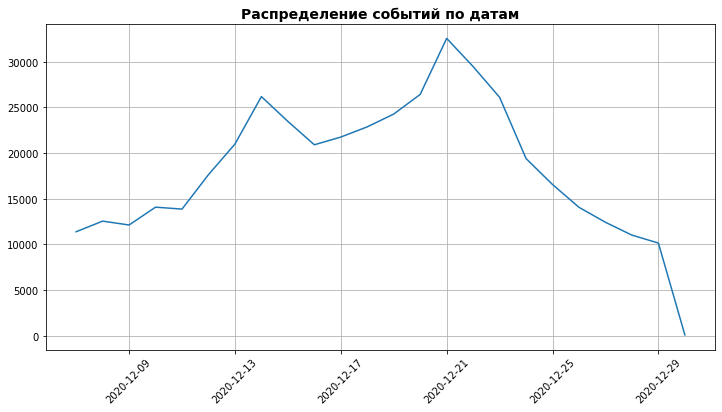

In [26]:
# Визуализируем количество событий по датам
plt.figure(figsize=(12, 6))
plt.plot('event_date', 'user_id', data = events_by_date)
plt.grid(b=True)
plt.xticks(rotation=45)
plt.title('Распределение событий по датам', fontsize=14, fontweight='bold')
plt.show()

In [27]:
# Смотрим количество событий по датам в конце периода
events_by_date.tail(5)

,event_date,user_id
19,2020-12-26,14058
20,2020-12-27,12420
21,2020-12-28,11014
22,2020-12-29,10146
23,2020-12-30,89


В ходе изучения датафрейма мы сделали следующие наблюдения:

1. Датафрейм содержит 440317 записей о событиях в период с 7 по 30 декабря 2020 года. Тест должен был закончиться 4 января 2021 года, но данные за период с 31 декабря по 4 января отсутствуют. Кроме того, количество записей за 29 декабря значительно ниже количества записей в другие дни периода.
2. Данные не содержат дубликатов, но содержат пропуски в столбце details - столбец заполнен только для событий purchase, в таком случае в нем указана стоимость покупки.

<a id = 'section_2.2'></a>
## 2.2 Проверка данных для анализа и приведение их в соответствие с техзаданием

Согласно техзаданию в тест должны были попасть пользователи со следующими характеристиками:

- регион пользователя - Европа,
- дата регистрации с 7 по 21 декабря.

При этом в тест должны были попасть 15% новых пользователей из региона Европа, зарегистрировавшихся за указанный период. Общее количество участников теста должно было составить 6000 человек. В тест должны были попасть логи пользователя за 2 недели.

Проверим, насколько полученные данные соответствуют техзаданию.

In [28]:
# Выделим в отдельный датасет пользователей из региона Европа, зарегистрировавшихся с 7 по 21 декабря
new_users_clean = final_ab_new_users.query('region == "EU" & ("2020-12-07" <= first_date <= "2020-12-21")')

# Выделим из датасета с участниками теста, только пользователей из Европы, зарегистрировавшихся в нужный период
participants_clean = (final_ab_participants
                      .query('ab_test == "recommender_system_test" & user_id.isin(@new_users_clean.user_id)'))

# Выведем количество таких пользователей
print('Общее количество участников теста:', len(participants_clean))
print("Доля участников теста от общего количества новых пользователей из региона Европа: {:.0%}"
       .format(len(participants_clean) / len(new_users_clean)))

Общее количество участников теста: 6351
Доля участников теста от общего количества новых пользователей из региона Европа: 15%


Видим, что в тест попал 6351 пользователь из региона Европа, что составило 15% от общего числа пользователей, зарегистрировавшихся в период с 7 по 21 декабря. Это соответствует техзаданию.

Однако, нам необходимо проанализировать логи каждого пользователя за 2 недели. Но мы знаем, что в датасете с записями событий, содержатся только события пользователей за период с 7 по 30 декабря, при этом данные за 30 декабря (судя по количеству записей за день) неполные. То есть имеются полные данные только за период с 7 по 29 декабря. Соответственно, в тест должны быть включены пользователи, которые были зарегистрированы только в период до 15 декабря включительно.

Выделим таких пользователей.

In [29]:
# Выделим в отдельный датасет пользователей из региона Европа, зарегистрировавшихся с 7 по 15 декабря
new_users_clean = final_ab_new_users.query('region == "EU" & ("2020-12-07" <= first_date <= "2020-12-15")')

# Выделим из датасета с участниками теста, только пользователей из Европы, зарегистрировавшихся в нужный период
participants_clean = (final_ab_participants
                      .query('ab_test == "recommender_system_test" & user_id.isin(@new_users_clean.user_id)'))

# Выведем количество таких пользователей
print('Общее количество участников теста:', len(participants_clean))
print("Доля участников теста от общего количества новых пользователей из региона Европа: {:.0%}"
       .format(len(participants_clean) / len(new_users_clean)))

Общее количество участников теста: 3812
Доля участников теста от общего количества новых пользователей из региона Европа: 15%


После удаления пользователей, не соответствующих части техзадания, общее количество участников теста составило 3812 пользователей, что существенно меньше, чем запланированное количество участников теста.

Далее проведем проверку на наличие пересечений пользователей нашего теста с пользователями, попавшими в другой тест, данные о котором содержатся в нашем датасете. Проверим, есть ли в датасете пользователи, участвовавшие в обоих тестах.

In [30]:
# Выделяем id пользователей, участвовавших в первом тесте 
final_test1_participants = final_ab_participants.query('ab_test == "recommender_system_test"')['user_id']

# Выделяем id пользователей, участвовавших во втором тесте 
final_test2_participants = final_ab_participants.query('ab_test == "interface_eu_test"')['user_id']

# Объединяем series и смотрим количество дубликатов
all_tests_participants = pd.concat([final_test1_participants, final_test2_participants])
print('Количество пользователей, которые участвовали в обоих тестах:', all_tests_participants.duplicated().sum())

Количество пользователей, которые участвовали в обоих тестах: 1602


Не будем удалять таких пользователей из набора данных, так как у нас нет информации о том, пересекались ли тесты по времени проведения. Однако, если было пересечение тестов по времени, то для таких пользователей невозможно оценить, какое из нововведений повлияло на изменение их поведения.

In [31]:
# Выберем записи о событиях, относящиеся только к участникам теста
test_events_clean = final_ab_events.query('user_id.isin(@participants_clean.user_id)')

# Посмотрим количество таких пользователей
test_events_clean['user_id'].nunique()

1660

Из 3812 участников теста только 1660 совершили какие-то действия за период теста.

<a id = 'section_2.3'></a>
## 2.3 Выводы и рекомендации

После изучения наборов данных можно сделать следующие выводы:

1. Собранные данные не в полной мере соответствовали техзаданию: набор данных о событиях не для всех пользователей содержал данные за 2 недели. После очистки данных от тех записей, которые не соответствовали техзаданию, в тестовой группе оказалось 3812 пользователей вместо запланированных 6000.
2. Аудитория теста на 42% пересекалась с аудиторией другого теста - таким образом, если тесты пересекались по времени, трудно определить за счет какого нововведения произошло изменение поведения пользователей.
3. Во время проведения теста проводилась маркетинговая акция, что также могло оказать влияние на поведение пользователей.

Рекомендации для проведения тестов в будущем:

1. Не проводить одновременно несколько тестов.
2. В период проведения тестов не проводить для аудитории теста специальных маркетинговых акций.
3. Контролировать, чтобы собираемые данные соответствовали техзаданию.

# Часть 3. Анализ результатов А/В-теста

<a id = 'section_3.1'></a>
## 3.1 Исследовательский анализ данных

Исследуем набор данных с событиями пользователей, участвовавших в А/В-тесте. Для начала объединим нужные данные в один датасет.

In [32]:
# Объединяем данные в один датафрейм
test_data = test_events_clean.merge(participants_clean, on = 'user_id', how = 'left')
test_data = test_data.merge(final_ab_new_users, on = 'user_id', how = 'left').drop(columns = ['ab_test', 'region'])

# Проверим количество записей
print(len(test_data))

# Посмотрим первые строки полученного датафрейма
test_data.head(3)

11261


,user_id,event_dt,event_name,details,event_date,group,first_date,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,A,2020-12-07,Android
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,A,2020-12-07,PC
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,B,2020-12-07,iPhone


In [33]:
# Меняем тип данных в столбце event_date
test_data['event_date'] = pd.to_datetime(test_data['event_date'])

# Проверяем, не осталось ли лишних данных
test_data['event_date'].describe()

count                   11261
unique                     24
top       2020-12-14 00:00:00
freq                     1263
first     2020-12-07 00:00:00
last      2020-12-30 00:00:00
Name: event_date, dtype: object

Данные за 30 декабря удалим из датафрейма, так как они неполные.

In [34]:
# Удаляем данные за 30 декабря
test_data = test_data.loc[test_data['event_date'] != '2020-12-30']

##### Проверка количества пользователей в группах

Проверим количество пользователей в контрольной и тестовой группе, а также изучим, есть ли пользователи, которые попали в обе группы. При наличии таких пользователей удалим их.

In [35]:
# Выделяем пользователей группы А и считаем их количество
group_a = test_data.query('group == "A"')
group_a_unique = pd.Series(group_a['user_id'].unique())
print('Количество пользователей в контрольной группе составляет:', len(group_a_unique))

# Выделяем пользователей группы В и считаем их количество
group_b = test_data.query('group == "B"')
group_b_unique = pd.Series(group_b['user_id'].unique())
print('Количество пользователей в тестовой группе составляет:', len(group_b_unique))

# Считаем количество пересечений пользователей из двух групп
group_ab = pd.concat([group_a_unique, group_b_unique])
print('Количество пользователей, попавших в обе группы:', group_ab.duplicated().sum())

Количество пользователей в контрольной группе составляет: 1153
Количество пользователей в тестовой группе составляет: 507
Количество пользователей, попавших в обе группы: 0


Количество пользователей в контрольной группе более, чем в 2 раза, превышает количество пользователей в тестовой группе. При этом в группах нет пользователей, которые попали в обе группы одновременно.

Для дальнейшего анализа выделим данные по двум группам - контрольной и тестовой - в отдельные датафреймы.

In [36]:
# Выделяем данные по каждой группе в отдельный датафрейм
group_a_daily_events = group_a.groupby('event_date').agg({'user_id': 'count'}).reset_index()
group_b_daily_events = group_b.groupby('event_date').agg({'user_id': 'count'}).reset_index()

##### Анализ распределения событий в группах по датам

Для начала проанализируем, как события в группах распределены по датам.

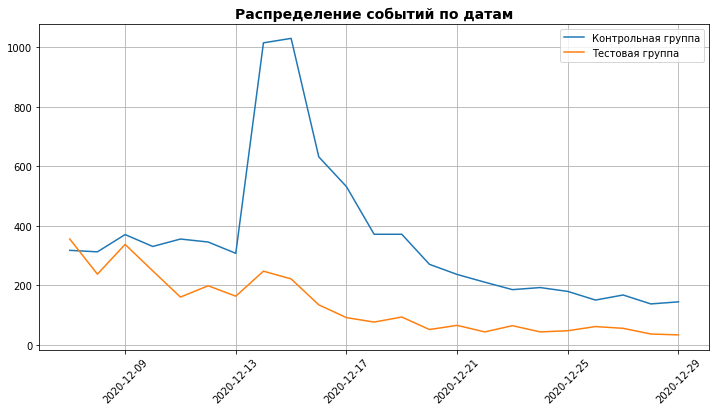

In [37]:
# Визуализируем количество событий по датам
plt.figure(figsize=(12, 6))
plt.plot('event_date', 'user_id', data = group_a_daily_events)
plt.plot('event_date', 'user_id', data = group_b_daily_events)
plt.grid(b=True)
plt.xticks(rotation=45)
plt.title('Распределение событий по датам', fontsize=14, fontweight='bold')
plt.legend(('Контрольная группа', 'Тестовая группа'))
plt.show()

Видим, что в основном события по датам распределены равномерно и тренды схожи для обоих групп - количество событий снижается с течением эксперимента.

Однако, количество событий 14 - 17 декабря дла контрольной группы сильно выбивается из общей картины - в эти даты число событий резко возросло более чем в 2 раза. В тестовой группе такого резкого скачка нет - похоже, все пользователи с возросшей активностью (причины которой необходимо изучать дополнительно) в основном попали в контрольную группу. Необходимо учитывать, что это может исказить результаты теста. 

##### Распределение количества событий на одного пользователя

Далее изучим, как в группах распределено количество сессий на пользователя.

In [38]:
# Формируем датафреймы с количество событий на одного пользователя для каждой группы
group_a_events_per_user = group_a.groupby('user_id').agg({'event_date': 'count'}).reset_index()
group_b_events_per_user = group_b.groupby('user_id').agg({'event_date': 'count'}).reset_index()

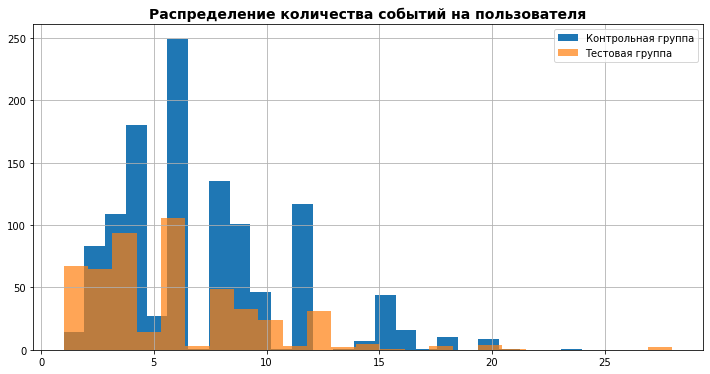

In [39]:
# Визуализируем данные
plt.figure(figsize=(12, 6))
group_a_events_per_user['event_date'].hist(bins = 25)
group_b_events_per_user['event_date'].hist(bins = 25, alpha = .7)
plt.grid(b=True)
plt.title('Распределение количества событий на пользователя', fontsize=14, fontweight='bold')
plt.legend(('Контрольная группа', 'Тестовая группа'))
plt.show()

Здесь мы видим очень схожие картины мультимодальных распределений с совпадающими модами.

##### Воронки событий

Теперь сравним воронки событий для разных групп. Чтобы оптимизировать процесс, напишем функцию для формирования таблицы с воронкой.

In [40]:
def funnel(df):
    funnel = (df
              .groupby('event_name')
              .agg({'user_id': 'nunique'})
              .reset_index())
    # Задаем порядок шагов в воронке
    funnel['event_name'] = pd.Categorical(funnel['event_name'], ["login", "product_page", "product_cart", "purchase"])
    funnel = funnel.sort_values(by='event_name')
    funnel.columns = ['event', 'users_count']
    # Считаем процент пользователей от общего количества уникальных пользователей, переходящих на следующий этап 
    funnel['event_users_to_all_users'] = (funnel['users_count'] / df['user_id'].nunique()).round(2)
    # Дополним таблицу столбцом с количеством ползователей на предыдущем шаге 
    funnel['prev_step_users'] = (funnel['users_count'].shift(periods=1)).astype(pd.Int32Dtype())
    funnel['prev_step_users'] = funnel['prev_step_users'].fillna(df['user_id'].nunique())
    # Считаем соотношение пользователей на текущем шаге к количеству пользователей на предыдущем шаге 
    funnel['event_users_to_prev_step_users'] = (funnel['users_count'] / funnel['prev_step_users']).round(2)
    return funnel

In [41]:
# Посмотрим на воронку для всех участников теста
funnel(test_data)

,event,users_count,event_users_to_all_users,prev_step_users,event_users_to_prev_step_users
0,login,1660,1.00,1660,1.00
2,product_page,1000,0.60,1660,0.60
1,product_cart,471,0.28,1000,0.47
3,purchase,469,0.28,471,1.00


In [42]:
# Построим воронку для группы А
funnel(group_a)

,event,users_count,event_users_to_all_users,prev_step_users,event_users_to_prev_step_users
0,login,1153,1.00,1153,1.00
2,product_page,719,0.62,1153,0.62
1,product_cart,344,0.30,719,0.48
3,purchase,328,0.28,344,0.95


In [43]:
# Построим воронку для группы В
funnel(group_b)

,event,users_count,event_users_to_all_users,prev_step_users,event_users_to_prev_step_users
0,login,507,1.00,507,1.00
2,product_page,281,0.55,507,0.55
1,product_cart,127,0.25,281,0.45
3,purchase,141,0.28,127,1.11


Сравнивая воронки групп А и В, можно отметить, что наибольшее отличие в конверсии наблюдается на этапе просмотра страницы с продуктом (различие на 7% от общего числа пользователей) - конверсия контрольной группы выше, чем конверсия тестовой группы. Затем следует различие в конверсии на этапе просмотра корзины (конверсия отличается на 5% от общего числа пользователей) - так же конверсия контрольной группы выше. Конверсия в покупку одинакова для обеих групп.


Для того, чтобы проверить наличие статистически значимых различий в конверсии между контрольной и тестовой группой проведем проверку  с использованием z-теста. Так как мы будем проводить целый ряд попарных сравнений, напишем функцию, чтобы оптимизировать данный процесс.

In [44]:
# Напишем функцию для проверки наличия стат. значимых отличий
def stat_difference_check(alpha, df1, df2, event_name):

    # Формулируем нулевую гипотезу
    print('Гипотеза:')
    print('H0: Конверсия в событие {} для групп A и B одинакова.'.format(event_name))
    print('H1: Конверсия в событие {} для групп A и B имеет статистически значимое различие.'
          .format(event_name))
    print()
    
    # Установливаем критический уровень статистической значимости
    alpha = alpha 

    # Выделяем количество уникальных пользователей в группе А, у которых наступило событие
    event_users_g1 = df1.query('event_name == @event_name')['user_id'].nunique()
    # Выделяем общее количество уникальных пользователей в группе А
    total_users_g1 = df1['user_id'].nunique()

    # Выделяе количество уникальных пользователей в группе В, у которых наступило событие
    event_users_g2 = df2.query('event_name == @event_name')['user_id'].nunique()
    # Выделяем общее количество уникальных пользователей в группе В
    total_users_g2 = df2['user_id'].nunique()

    # Посчитаем пропорцию успехов в группе А и группе В и выведем на экран 
    p1 = event_users_g1 / total_users_g1
    p2 = event_users_g2 / total_users_g2
    print('Результат сравнения:')
    print('Соотношение пользователей, у которых произошло событие {}, к общему числу пользователей:'.format(event_name))
    print('группа A - {:.2%};'.format(p1))
    print('группа B - {:.2%}.'.format(p2))
   
    # Посчитаем общую пропорцию успехов
    p_combined = (event_users_g1 + event_users_g2) / (total_users_g1 + total_users_g2)

    # Считаем разницу пропорций в датасетах
    difference = p1 - p2 

    # Считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_users_g1 + 1/total_users_g2))

    # Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    # Считаем p-значение
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    # Выводим полученное р-значение и вывод о результате проведенного сравнения
    print('P-значение:', p_value)
    print()
    
    if (p_value < alpha):
        print('Вывод:')
        print('Отвергаем нулевую гипотезу - между долями есть значимая разница.')
    else:
        print('Вывод:')
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.') 

Сравним конверсию в двух группах на каждом этапе воронки событий с помощью функции.

In [45]:
stat_difference_check(.05, group_a, group_b, "product_page")

Гипотеза:
H0: Конверсия в событие product_page для групп A и B одинакова.
H1: Конверсия в событие product_page для групп A и B имеет статистически значимое различие.

Результат сравнения:
Соотношение пользователей, у которых произошло событие product_page, к общему числу пользователей:
группа A - 62.36%;
группа B - 55.42%.
P-значение: 0.007833188211841868

Вывод:
Отвергаем нулевую гипотезу - между долями есть значимая разница.


In [46]:
stat_difference_check(.05, group_a, group_b, "product_cart")

Гипотеза:
H0: Конверсия в событие product_cart для групп A и B одинакова.
H1: Конверсия в событие product_cart для групп A и B имеет статистически значимое различие.

Результат сравнения:
Соотношение пользователей, у которых произошло событие product_cart, к общему числу пользователей:
группа A - 29.84%;
группа B - 25.05%.
P-значение: 0.04634799284661306

Вывод:
Отвергаем нулевую гипотезу - между долями есть значимая разница.


In [47]:
stat_difference_check(.05, group_a, group_b, "purchase")

Гипотеза:
H0: Конверсия в событие purchase для групп A и B одинакова.
H1: Конверсия в событие purchase для групп A и B имеет статистически значимое различие.

Результат сравнения:
Соотношение пользователей, у которых произошло событие purchase, к общему числу пользователей:
группа A - 28.45%;
группа B - 27.81%.
P-значение: 0.7906612148912173

Вывод:
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.


Z-тест показал, что на этапах просмотра страницы с продуктом и на этапе просмотра корзины разница в конверсии в ~7% и ~5% является статистически значимой. На этапе покупки z-тест не выявил статистический значимой разницы между конверсией групп. 

<a id = 'section_3.2'></a>
## 3.2 Выводы

На основании проведенного анализа мы можем сделать следующие выводы об А/В-тесте:

##### Проверка корректности проведения теста (соответствие техзаданию)

Выявлены многочисленные отклонения от техзадания в процессе сбора данных. Итоговые данные, вошедшие в анализ, не соответствуют техзаданию и требованиям к проведению тестов по следующим критериям:

- количество пользователей
- период проведения теста
- пересечение с маркетинговыми акциями и конкурирующими тестами

##### Оценка результатов теста

Анализ имеющихся результатов теста показал, что улучшенная рекомендательная система не привела к ожидаемым изменениям: вместо увеличения конверсии на каждом этапе на 10% произошло снижение конверсии на 2 из 3 этапов.

Однако, с учетом выявленных отклонений в ходе проведения теста, не рекомендуется рассматривать результаты данного теста для принятия окончательного решения о внедрении / остановке внедрения новой рекомендательной системы. Рекомендуется повторное проведение теста с соблюдением требований техзадания.